In [91]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
"""
@File    ：PressureLocationProcess.py
@Author  ：zhaolin
@Date    ：2022/3/31 14:35
"""
from math import tan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题

def showImages(images, titles=[''], size=[1, 1], BGR=False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b, g, r = cv2.split(images[i])
            showImage = cv2.merge([r, g, b])
        plt.imshow(showImage, 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

# 裁剪黑边
def cutVerticalBlack(img):
    new_img = []
    for i in range(0, len(img)):
        sizes = int(sum(img[i]) / 255)
        if sizes > 20:
            new_img.append(img[i])
    return new_img

def getDistance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)

blockSize = 15
def getAvgColorList(img):
    row = img.shape[0]
    col = img.shape[1]
    # blockSize = 50 # 裁剪区块边长度，正方形
    blocks = [] # 存放切片
    avgColors = [] # 每个区块对应的颜色值
    rowGroupNum = math.ceil(row / blockSize)
    colGroupNum = math.ceil(col / blockSize)
    for i in range(rowGroupNum):
        for j in range(colGroupNum):
            curBlock = img[
                i*blockSize : (i+1)*blockSize,
                j*blockSize : (j+1)*blockSize
            ]
            curB, curG, curR = cv2.split(curBlock)
            avgColors.append((
                int(np.mean(curB)),
                int(np.mean(curG)),
                int(np.mean(curR)),
            ))
            blocks.append(curBlock)
    return rowGroupNum, colGroupNum, blocks, avgColors

def drawBlock(img, blocks):
    res = img.copy()
    row = img.shape[0]
    col = img.shape[1]
    # blockSize = 50 # 裁剪区块边长度，正方形]
    colGroupNum = math.ceil(col / blockSize)
    font_size = 5
    for index in blocks:
        left = blockSize * (index % colGroupNum)
        top = blockSize * int(index / colGroupNum)
        right = left + blockSize
        bottom = top + blockSize
        cv2.rectangle(res, (left, top), (right, bottom), (0, 255, 0), font_size, 4)
    return res

base1 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/base/base1.png', cv2.IMREAD_COLOR)
base2 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/base/base2.png', cv2.IMREAD_COLOR)
base3 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/base/base3.png', cv2.IMREAD_COLOR)
base4 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/base/base4.png', cv2.IMREAD_COLOR)

_, _, _, base1Colors = getAvgColorList(base1)
_, _, _, base2Colors = getAvgColorList(base2)
_, _, _, base3Colors = getAvgColorList(base3)
_, _, _, base4Colors = getAvgColorList(base4)

baseDuck = list(set(base1Colors) ^ set(base2Colors) ^ set(base3Colors) ^ set(base4Colors))

test_p8 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/异常/8.png', cv2.IMREAD_COLOR)
test_p9 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/异常/9.png', cv2.IMREAD_COLOR)
test_p13 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/异常/13.png', cv2.IMREAD_COLOR)
test_p15 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/异常/15.png', cv2.IMREAD_COLOR)
test_p18 = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/window正式测试图片/异常/18.png', cv2.IMREAD_COLOR)

疑似污染点个数:  18


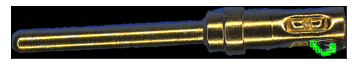

In [101]:
def isKeep(o_list, color):
    if set(o_list).__contains__(color):
        return True
    for o_color in o_list:
        if getDistance(o_color, color) < 25:
            return True
    return False

# 污染图片
targetImg = test_p13
# 正常图片
# targetImg = base3

_, _, _, baseColors = getAvgColorList(targetImg[:, 0:int(0.77 * targetImg.shape[1])])
_, _, _, p1Colors = getAvgColorList(targetImg)

baseColors = list(set(baseColors) ^ set(base5Colors))
diffColorIndex = []
for i in range(len(p1Colors)):
    # if set(baseColors[np.maximum(i-10, 0) : np.minimum(len(p1Colors), i+10)]).__contains__(p1Colors[i]):
    # if baseColors[i] == p1Colors[i]:
    if not isKeep(baseColors, p1Colors[i]):
        diffColorIndex.append(i)
print("疑似污染点个数: ", len(diffColorIndex))
showImages([drawBlock(targetImg, diffColorIndex)], BGR=True)
# cv_show(drawBlock(targetImg, diffColorIndex))

In [188]:
show_img = test_p18
showImages([show_img, show_img[:, 0:int(0.77 * p1.shape[1])]], ['',''], [2,1], BGR=True)

In [159]:
set(baseColors[40 : 60]).__contains__((122, 102, 96))

True

In [164]:
index = 49
print(p1Colors[index])
print(baseColors[index])

(130, 107, 100)
(130, 107, 100)


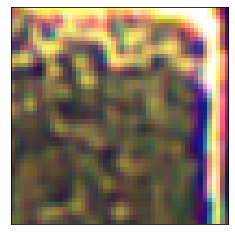

In [86]:
showImages([blocks[101]], BGR=True)

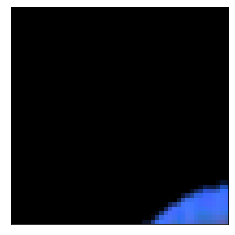

In [65]:
showImages([base[0:50, 0:50]], BGR=True)

In [66]:
base[0:50, 0:50]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [238, 117,  69],
        [233, 116,  64],
        [225, 115,  57]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [219, 111,  72],
        [209, 109,  75],
        [193, 107,  67]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [192, 104,  76],
        [184, 100,  88],
        [172,  95,  81]]

In [25]:
base.shape

(266, 1873, 3)

In [41]:
for i in range(0, 5):
    print(i)

0
1
2
3
4


In [123]:
getDistance(
    [1, 1, 1],
    [2, 2, 2]
)

1.7320508075688772

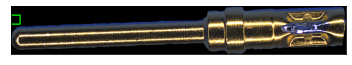

In [211]:
showImages([drawBlock(p1, [38])], BGR=True)